<a href="https://colab.research.google.com/github/cjaucian/MAT421/blob/main/ModuleB_17_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**17.1 Interpolation Problem Statement**



If we are given a data set of x-values and the corresponding y-values, we can use interpolation to determine a specific y_i for a given x_i value. An interpolation function will have a large number of accurate points, from this we can estimate additional points without requiring a defining model, as is needed in regression models.

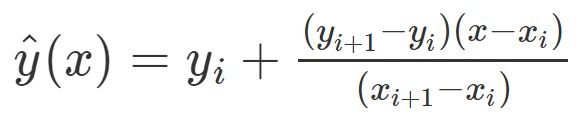

**Example** Given a set of data points, use interpolation to find the value of a specific x between x=3 and x=7.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

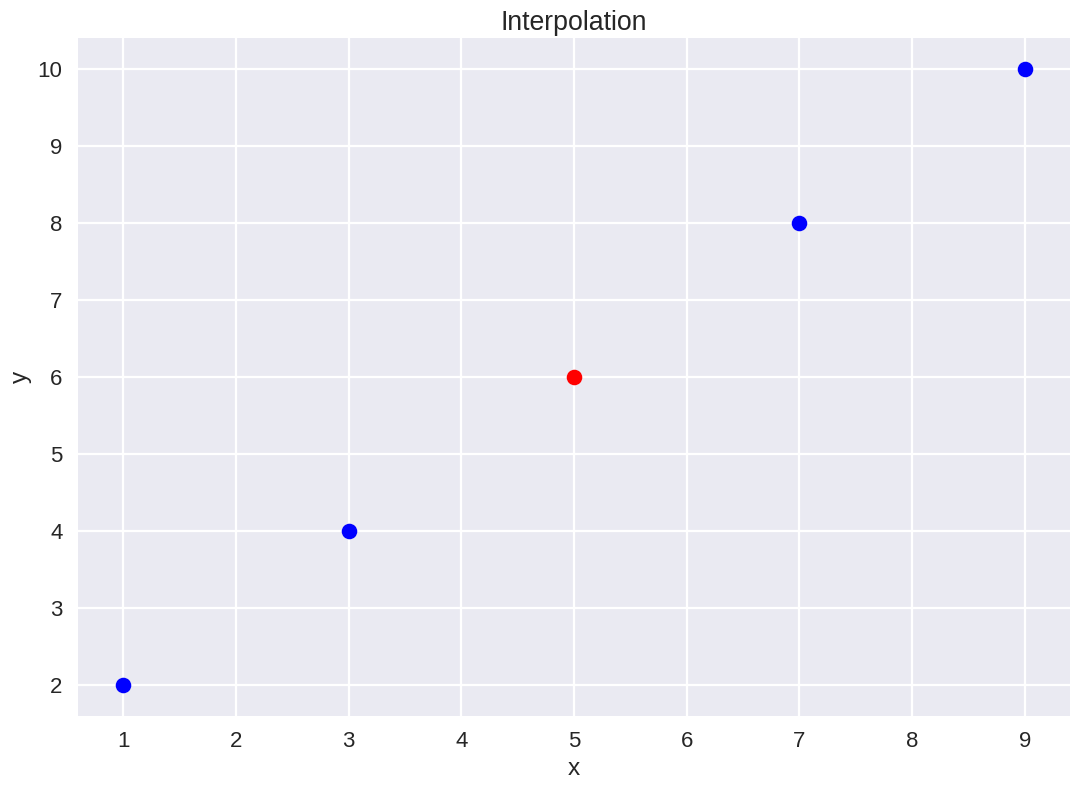

In [7]:
import matplotlib.pyplot as plt

x = [1, 3, 7, 9]
y = [2, 4, 8, 10]
plt.plot(x,y,'bo',5,6,'ro')
plt.title('Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt

**17.2 Linear Interpolation**

Linear interpolation makes point estimates assuming that the unknown point is located on a line that connects the known point to the left and right of the unknown point.

To find the y-value of the estimated point, we use:

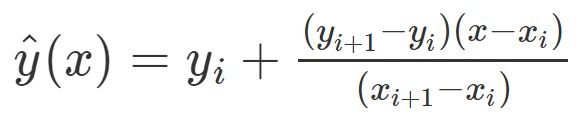

**Example** Find the linear interpolation at x = 0.75 based on the data x = [0, 0.5, 1, 1.5, 2], y = [1,1.5,3,1.5,1].

2.25
1.25


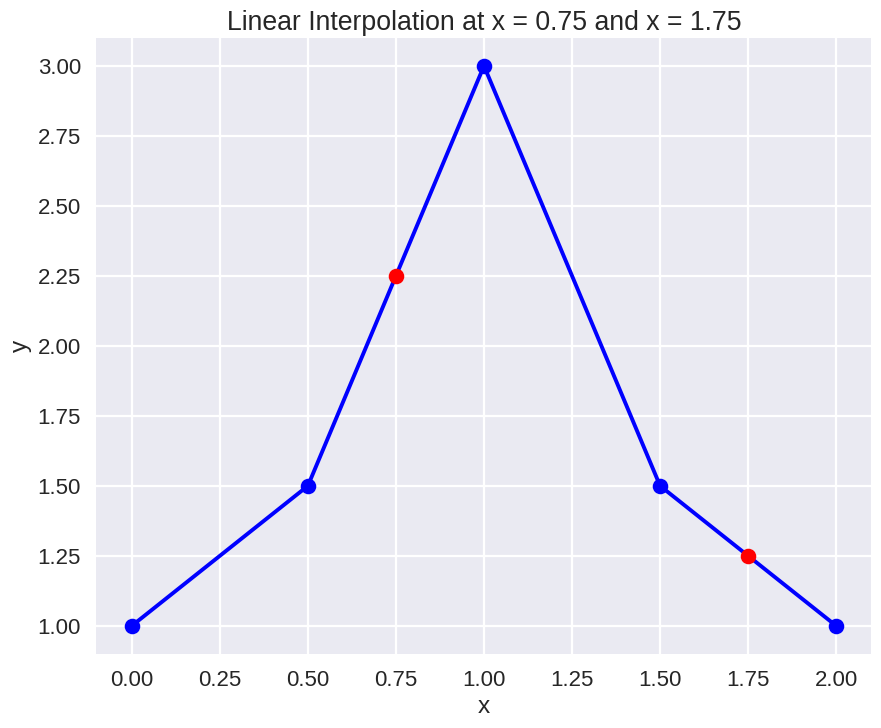

In [6]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-poster')

x = [0,0.5,1,1.5,2]
y = [1,1.5,3,1.5,1]

f = interp1d(x,y)
y_hat1 = f(0.75)
y_hat2 = f(1.75)
print(y_hat1)
print(y_hat2)

plt.figure(figsize = (10,8))
plt.plot(x,y,"-ob")
plt.plot(0.75,y_hat1,"ro")
plt.plot(1.75,y_hat2,"ro")
plt.title("Linear Interpolation at x = 0.75 and x = 1.75")
plt.xlabel("x")
plt.ylabel("y")
plt.show()




**17.3 Cubic Spline Interpolation**

Estimating points when the interpolation function is not linear, requires the use of Cubic Spline Interpolation. This interpolation function consists of "a set of piecewise cubic functions". In this, we must assume that two known points on the left and right of an estimated point are connected by a cubic polynomial:

S(x) = ax^3 + bx^2 + cx + d

We must first find the 4 coefficients of each cubic function. If we have (n) points, then there will be (n-1) cubic functions to determine the Cubic Interpolation function. This means that we are actually finding 4(n-1) coefficients in total.

In Python, we can make use of the CubicSpline function in scipy.

**Example** Plot the cubic spline interpolation of the data, x = [0,0.5,1,1.5,2], y = [1,1.5,3,1.5,1] for the interval of 0 to 2.

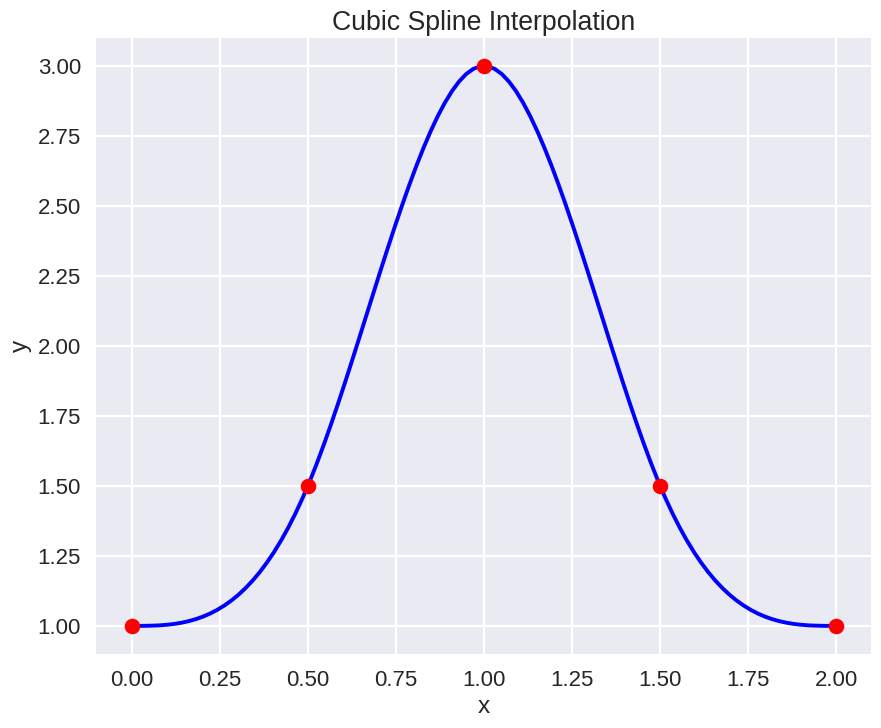

In [8]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-poster')

x = [0,0.5,1,1.5,2]
y = [1,1.5,3,1.5,1]

f = CubicSpline(x,y, bc_type="natural")
x_new = np.linspace(0,2,100)
y_new = f(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, "b")
plt.plot(x, y, "ro")
plt.title("Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

To solve for the cubic polynomials of a data set, we would need to create a system of equations and then solve for the unknown coefficients. Once we have created the system of equations, they can be entered in Python as matrices. The system can then be solved in matrix from.